# Intoduction

👋Hello this is my profile
I’m Muhammad Septian Zamzani, a Data Scientist driven by a passion for turning raw data into meaningful insights. With robust training from Hacktiv8’s Full Time Data Science program and a experience background in industries such as Creative, and education, I'm skilled at using data to solve practical issues in real-world and support strategic business decisions📊🔍.

You can check my recent project [Click Here](https://github.com/mseptianz)



# Import Libraries
---

In [ ]:
import pandas as pd 
import numpy as np 
import random 

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt 
import matplotlib.cm as cm

import seaborn as sns 
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import norm




# Create Sample Data
---

In [2]:
# '''
# - Sample data akan dibuat menggunakan Library random yang dapat membuat data sebanyak yang kita inginkan secara acak,
# - Data awal memiliki variabel "Nama Lokasi", "Jam Login", "Nama, Email", "No Telp", "Tahun Lahir", "Merk HP", "Digital Interest", "Location Type",
# - Data memiliki 1000 baris
# '''
# sample_data = { 
#     "Nama_Lokasi": [random.choice(['Jakarta','Bandung','Bekasi','Solo','Semarang','Yogyakarta','Denpasar','Surabaya','Balikpapan','Depok'])for _ in range(1000)],
#     "Jam_Login":[f"{random.randint(0,23):02d}:{random.randint(0,59):02d}" for _ in range(1000)],
#     "Nama":[f"User_{i}"for i in range(1,1001)],
#     "Email":[f"user{i}@gmail.com" for i in range(1,1001)],
#     "No_Telp":[f"08{random.randint(1000000000, 9999999999)}" for _ in range(1000)],
#     "Tahun_Lahir": [random.randint(1970,2010)for _ in range(1000)],
#     "Merk_Hp":[random.choice(['Apple','Vivo','Samsung','Xiaomi','Redmi','Oppo'])for _ in range(1000)],
#     "Digital_Interest":[random.choice(['Gaming','Streaming','Shopping','Social Media'])for _ in range(1000)],
#     "Location Type": [random.choice(["Kota", "Desa"]) for _ in range(1000)]
# }

# data = pd.DataFrame(sample_data)


Setelah Pembuatan sample data berhasil, data akan diexport kedalam file dengan format csv

In [3]:
# data.to_csv('data.csv', index=False)


# Data Dictionary
---

| **Field Name**      | **Description**                                             |
|---------------------|-------------------------------------------------------------|
| Nama Lokasi         | Lokasi geografis pengguna.                                   |
| Jam Login           | Waktu login pengguna ke sistem.                             |
| Nama                | Nama pengguna.                                               |
| Email               | Alamat email pengguna.                                       |
| No Telp             | Nomor telepon pengguna.                                      |
| Tahun Lahir         | Tahun kelahiran pengguna.                                    |
| Merk HP             | Merk smartphone pengguna.                                    |
| Digital Interest    | Ketertarikan pengguna di bidang digital.                     |
| Zona Lokasi         | Tipe wilayah pengguna (urban atau rural).                    |


**Problem Statement**

"Perusahaan ingin menganalisis preferensi merek ponsel dan pola aktivitas digital berdasarkan kelompok usia (dewasa, remaja, lansia) dalam 1 bulan untuk mengidentifikasi waktu penggunaan dan jenis aktivitas yang paling dominan. Berdasarkan hasil analisis ini, perusahaan akan merancang strategi pemasaran yang terfokus dan meningkatkan pengalaman pengguna dalam 2 bulan untuk meningkatkan keterlibatan dan penjualan."

**SMART**
- Specific (Spesifik):
    - Menganalisis preferensi merek ponsel dan pola aktivitas digital berdasarkan kelompok usia (dewasa, remaja, lansia).

- Measurable (Terukur):
    - Analisis dilakukan untuk setiap kelompok usia dan preferensi merek ponsel.
    - Mengukur pola aktivitas digital berdasarkan waktu (pagi, siang, malam).

- Achievable (Tercapai):
    - Data yang tersedia sudah cukup untuk menganalisis preferensi dan pola aktivitas pengguna.
    - Tim pemasaran dapat merancang strategi berdasarkan analisis ini.

- Relevant (Relevan):
    - Analisis ini akan membantu perusahaan memahami target pasar dan preferensi konsumen.
    - Ini akan mempengaruhi strategi pemasaran dan meningkatkan penjualan.

- Time-bound (Terbatas Waktu):
    - Analisis akan diselesaikan dalam 1 bulan.


# Load Data
---

In [4]:
df = pd.read_csv("data.csv")

In [5]:
df.head()

,Nama_Lokasi,Jam_Login,Nama,Email,No_Telp,Tahun_Lahir,Merk_Hp,Digital_Interest,Location Type
0,Bandung,3:44,User_1,user1@gmail.com,87695329652,2002,Redmi,Social Media,Kota
1,Balikpapan,18:24,User_2,user2@gmail.com,89578827034,1990,Oppo,Streaming,Kota
2,Yogyakarta,2:58,User_3,user3@gmail.com,88744960621,1996,Oppo,Streaming,Kota
3,Solo,20:02,User_4,user4@gmail.com,84411528625,1984,Redmi,Gaming,Kota
4,Jakarta,7:12,User_5,user5@gmail.com,83602433440,1980,Xiaomi,Shopping,Desa


Dari Kolom-kolom yang sudah ada, akan dibuat beberapa kolom baru untuk mempermudah kita saat melakukan analisis,diantaranya :
- "Usia" : Hasil dari tahun saat ini dikurangi dengan `Tahun_Lahir`
- "Kategori_Usia" : Hasil dari pengelompokan usia menjadi
    - Anak-anak (0-12 tahun)
    - Remaja (13-17 tahun)
    - Dewasa (18-59 tahun)
    - Lansia (> 60 tahun)
- "Waktu_login": Membagi jam login menjadi waktu tertentu :
    - Pagi (05:00-11:59)
    - Siang (12:00-16:59)
    - Malam (17:00-23:59)
    - Dini Hari (23:00-04:59)

# Add New Variable
---

In [6]:
# Membuat Kolom Usia
df['Usia'] = 2024 - df['Tahun_Lahir']
df

,Nama_Lokasi,Jam_Login,Nama,Email,No_Telp,Tahun_Lahir,Merk_Hp,Digital_Interest,Location Type,Usia
0,Bandung,3:44,User_1,user1@gmail.com,87695329652,2002,Redmi,Social Media,Kota,22
1,Balikpapan,18:24,User_2,user2@gmail.com,89578827034,1990,Oppo,Streaming,Kota,34
2,Yogyakarta,2:58,User_3,user3@gmail.com,88744960621,1996,Oppo,Streaming,Kota,28
3,Solo,20:02,User_4,user4@gmail.com,84411528625,1984,Redmi,Gaming,Kota,40
4,Jakarta,7:12,User_5,user5@gmail.com,83602433440,1980,Xiaomi,Shopping,Desa,44
...,...,...,...,...,...,...,...,...,...,...
995,Yogyakarta,5:11,User_996,user996@gmail.com,87645912180,1987,Xiaomi,Social Media,Kota,37
996,Denpasar,18:44,User_997,user997@gmail.com,84966859364,1982,Samsung,Gaming,Kota,42
997,Jakarta,20:03,User_998,user998@gmail.com,81863828986,1979,Xiaomi,Shopping,Desa,45
998,Denpasar,1:20,User_999,user999@gmail.com,88129791262,2002,Redmi,Streaming,Kota,22


In [7]:
# Membagi Kategori usia
def kategori_usia(usia):
    if usia < 12:
        return 'Anak-anak'
    elif usia > 12 and usia < 17:
        return 'Remaja'
    elif usia > 17 and usia < 60: 
        return 'Dewasa'
    else : 
        return 'Lansia'
# Menggunakan fungsi "kategori_usia" pada kolom usia untuk membuat kolom Kategori_Usia
df['Kategori_Usia'] = df['Usia'].apply(kategori_usia)
df

,Nama_Lokasi,Jam_Login,Nama,Email,No_Telp,Tahun_Lahir,Merk_Hp,Digital_Interest,Location Type,Usia,Kategori_Usia
0,Bandung,3:44,User_1,user1@gmail.com,87695329652,2002,Redmi,Social Media,Kota,22,Dewasa
1,Balikpapan,18:24,User_2,user2@gmail.com,89578827034,1990,Oppo,Streaming,Kota,34,Dewasa
2,Yogyakarta,2:58,User_3,user3@gmail.com,88744960621,1996,Oppo,Streaming,Kota,28,Dewasa
3,Solo,20:02,User_4,user4@gmail.com,84411528625,1984,Redmi,Gaming,Kota,40,Dewasa
4,Jakarta,7:12,User_5,user5@gmail.com,83602433440,1980,Xiaomi,Shopping,Desa,44,Dewasa
...,...,...,...,...,...,...,...,...,...,...,...
995,Yogyakarta,5:11,User_996,user996@gmail.com,87645912180,1987,Xiaomi,Social Media,Kota,37,Dewasa
996,Denpasar,18:44,User_997,user997@gmail.com,84966859364,1982,Samsung,Gaming,Kota,42,Dewasa
997,Jakarta,20:03,User_998,user998@gmail.com,81863828986,1979,Xiaomi,Shopping,Desa,45,Dewasa
998,Denpasar,1:20,User_999,user999@gmail.com,88129791262,2002,Redmi,Streaming,Kota,22,Dewasa


In [8]:
# Membuat kolom baru "waktu_login" dengan membagi jam_login kedalam beberapa kategori

def waktu_login(jam_login):
    # Mengambil jam dari format waktu (hh:mm)
    jam = int(jam_login.split(':')[0])
    
    if 5 <= jam <= 11:
        return 'Pagi'
    elif 12 <= jam <= 16:
        return 'Siang'
    elif 17 <= jam <= 23:
        return 'Malam'
    else:
        return 'Dini Hari'

# Menggunakan fungsi untuk membuat kolom Waktu_login
df['Waktu_login'] = df['Jam_Login'].apply(waktu_login)
df

,Nama_Lokasi,Jam_Login,Nama,Email,No_Telp,Tahun_Lahir,Merk_Hp,Digital_Interest,Location Type,Usia,Kategori_Usia,Waktu_login
0,Bandung,3:44,User_1,user1@gmail.com,87695329652,2002,Redmi,Social Media,Kota,22,Dewasa,Dini Hari
1,Balikpapan,18:24,User_2,user2@gmail.com,89578827034,1990,Oppo,Streaming,Kota,34,Dewasa,Malam
2,Yogyakarta,2:58,User_3,user3@gmail.com,88744960621,1996,Oppo,Streaming,Kota,28,Dewasa,Dini Hari
3,Solo,20:02,User_4,user4@gmail.com,84411528625,1984,Redmi,Gaming,Kota,40,Dewasa,Malam
4,Jakarta,7:12,User_5,user5@gmail.com,83602433440,1980,Xiaomi,Shopping,Desa,44,Dewasa,Pagi
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Yogyakarta,5:11,User_996,user996@gmail.com,87645912180,1987,Xiaomi,Social Media,Kota,37,Dewasa,Pagi
996,Denpasar,18:44,User_997,user997@gmail.com,84966859364,1982,Samsung,Gaming,Kota,42,Dewasa,Malam
997,Jakarta,20:03,User_998,user998@gmail.com,81863828986,1979,Xiaomi,Shopping,Desa,45,Dewasa,Malam
998,Denpasar,1:20,User_999,user999@gmail.com,88129791262,2002,Redmi,Streaming,Kota,22,Dewasa,Dini Hari


# Confidence Interval
---

In [9]:
mean = df['Usia'].mean()  # Rata-rata sampel
print("Rata-rata :",mean)
std = df['Usia'].std() # Standar deviasi sampel
print("Standar Deviasi :",std)

Rata-rata : 33.887
Standar Deviasi : 11.782404510797253


In [10]:
n = len(df['Usia'])  # Jumlah sampel
z = norm.ppf(0.975)  # Z-score untuk 95% confidence level

# Confidence Interval
ci_lower = mean - z * (std / np.sqrt(n))
ci_upper = mean + z * (std / np.sqrt(n))

print(f"Confidence Interval: {ci_lower:.2f} - {ci_upper:.2f}")

Confidence Interval: 33.16 - 34.62


- Rata-rata Usia: Nilai rata-rata usia adalah 33.887, yang menunjukkan usia rata-rata dari populasi yang ada dalam dataset tersebut.

- Confidence Interval (CI):

    - Lower Bound (Batas Bawah): 33.16
    - Upper Bound (Batas Atas): 34.62

Artinya, dengan tingkat kepercayaan 95%,usia rata-rata pengguna yang ada dalam sampel ini terletak antara 33.16 dan 34.62 tahun.

# Data Preparation 
---

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nama_Lokasi       1000 non-null   object
 1   Jam_Login         1000 non-null   object
 2   Nama              1000 non-null   object
 3   Email             1000 non-null   object
 4   No_Telp           1000 non-null   int64 
 5   Tahun_Lahir       1000 non-null   int64 
 6   Merk_Hp           1000 non-null   object
 7   Digital_Interest  1000 non-null   object
 8   Location Type     1000 non-null   object
 9   Usia              1000 non-null   int64 
 10  Kategori_Usia     1000 non-null   object
 11  Waktu_login       1000 non-null   object
dtypes: int64(3), object(9)
memory usage: 93.9+ KB


Dari Hasil cek diatas, diketahui : 
- Data yang ada memiliki 12 kolom dengan 1000 baris
- Terdapat ketidak sesuaian tipe data pada kolom `Jam_Login` dan kolom `No_telp`



## Change Data Type


In [12]:
# Mengubah tipe data `Jam_Login` menjadi datetime
df['Jam_Login'] = pd.to_datetime(df['Jam_Login'], format='%H:%M').dt.time
# Mengubah tipe data `No_telp` menjadi integer
df['No_Telp'] = pd.to_numeric(df['No_Telp'], errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Nama_Lokasi       1000 non-null   object
 1   Jam_Login         1000 non-null   object
 2   Nama              1000 non-null   object
 3   Email             1000 non-null   object
 4   No_Telp           1000 non-null   int64 
 5   Tahun_Lahir       1000 non-null   int64 
 6   Merk_Hp           1000 non-null   object
 7   Digital_Interest  1000 non-null   object
 8   Location Type     1000 non-null   object
 9   Usia              1000 non-null   int64 
 10  Kategori_Usia     1000 non-null   object
 11  Waktu_login       1000 non-null   object
dtypes: int64(3), object(9)
memory usage: 93.9+ KB


Ketidak sesuaian tipe data telah diatasi,selanjutnya akan dilakukan pengecekan missing value dan pengecekan data duplikat


## Check Missing Values

In [14]:
df.isnull().sum()

Nama_Lokasi         0
Jam_Login           0
Nama                0
Email               0
No_Telp             0
Tahun_Lahir         0
Merk_Hp             0
Digital_Interest    0
Location Type       0
Usia                0
Kategori_Usia       0
Waktu_login         0
dtype: int64

Setelah dilakukan pengecekan ternyata,tidak terdapat missing value pada data yang dimiliki 

## Check Data Duplicate 

In [15]:
df.duplicated().sum()

0

Tidak terdapat data duplikat pada data yang dimiliki

>Data Preparation selesai kita akan melanjutkannya ke tahap analisis data

# Exploratory Data Analyst (EDA)
---

In [16]:
df.head()

,Nama_Lokasi,Jam_Login,Nama,Email,No_Telp,Tahun_Lahir,Merk_Hp,Digital_Interest,Location Type,Usia,Kategori_Usia,Waktu_login
0,Bandung,03:44:00,User_1,user1@gmail.com,87695329652,2002,Redmi,Social Media,Kota,22,Dewasa,Dini Hari
1,Balikpapan,18:24:00,User_2,user2@gmail.com,89578827034,1990,Oppo,Streaming,Kota,34,Dewasa,Malam
2,Yogyakarta,02:58:00,User_3,user3@gmail.com,88744960621,1996,Oppo,Streaming,Kota,28,Dewasa,Dini Hari
3,Solo,20:02:00,User_4,user4@gmail.com,84411528625,1984,Redmi,Gaming,Kota,40,Dewasa,Malam
4,Jakarta,07:12:00,User_5,user5@gmail.com,83602433440,1980,Xiaomi,Shopping,Desa,44,Dewasa,Pagi


## 1. Bagaimana Distribusi Usia Pengguna ?

In [17]:
distribusi_pengguna = df['Kategori_Usia'].value_counts().reset_index()
distribusi_pengguna

,Kategori_Usia,count
0,Dewasa,898
1,Remaja,71
2,Lansia,31


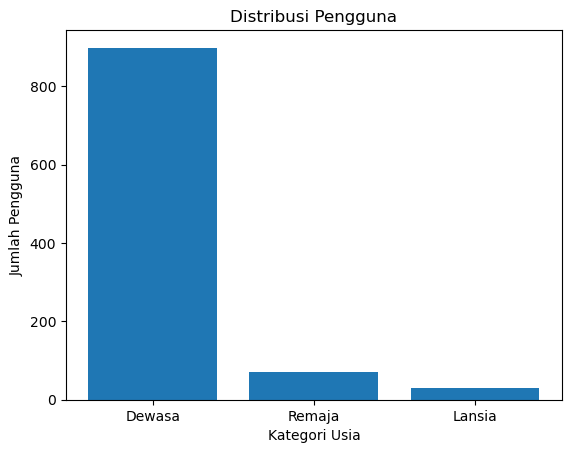

In [18]:
# Membuat bar chart
plt.bar(distribusi_pengguna['Kategori_Usia'], distribusi_pengguna['count'])
plt.xlabel('Kategori Usia')
plt.ylabel('Jumlah Pengguna')
plt.title('Distribusi Pengguna')
plt.show()

Dari Visualisasi diatas dapat dilihat bahwa : 
- Sebagian besar pengguna termasuk dalam kategori dewasa: Terlihat jelas bahwa jumlah pengguna dewasa jauh lebih banyak dibandingkan dengan kategori remaja dan lansia. 
- Minat pengguna remaja cukup signifikan: Meskipun tidak sebanyak pengguna dewasa, jumlah pengguna remaja juga cukup signifikan. 
- Pengguna lansia memiliki jumlah yang paling sedikit: Jumlah pengguna lansia adalah yang paling sedikit di antara ketiga kategori usia. Ini bisa menjadi indikasi bahwa produk atau layanan Anda belum terlalu menarik bagi kelompok usia ini.

Insight dan Implikasi:

Fokus pada pengguna dewasa:
 Karena sebagian besar pengguna Anda adalah dewasa, maka strategi pemasaran dan pengembangan produk sebaiknya lebih fokus pada kebutuhan dan preferensi kelompok usia ini.


## 2. Distribusi Waktu Login 


In [19]:
total_login = df.groupby('Waktu_login')['Kategori_Usia'].count().reset_index(name= 'Total login')
total_login

,Waktu_login,Total login
0,Dini Hari,215
1,Malam,289
2,Pagi,293
3,Siang,203


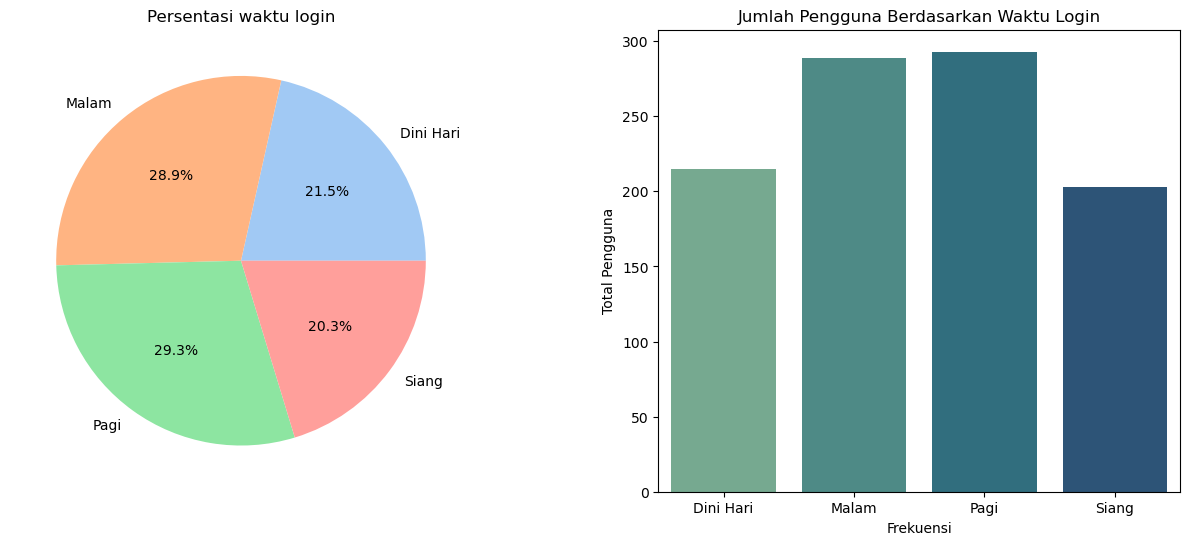

In [20]:
# Create a figure 
plt.figure(figsize=(16, 6))

# set color 
colors = sns.color_palette('pastel')

# visualize 1 
plt.subplot(1,2,1)
# convert to dictionary
total_login_dict= dict(zip(total_login['Waktu_login'],total_login['Total login']))
plt.pie(total_login_dict.values(),labels=total_login_dict.keys(), autopct='%1.1f%%',colors=colors)
plt.title('Persentasi waktu login')

# Visualize 2 
plt.subplot(1, 2, 2)
sns.barplot(x='Waktu_login', y='Total login', data=total_login, palette='crest')
plt.title('Jumlah Pengguna Berdasarkan Waktu Login')
plt.xlabel('Frekuensi')
plt.ylabel('Total Pengguna')

# Adjust spacing between subplots
plt.subplots_adjust(left=0.1, right=0.85, wspace=0.3)

# Show the plot
plt.show()

Dar 2 Visualisasi diatas :
- Pie Chart:
   - Malam (27%): Sebagian besar pengguna login pada malam hari, yang mungkin menunjukkan penggunaan layanan untuk hiburan atau aktivitas santai.
   - Dini Hari (19,7%): Ada kelompok pengguna yang login pada dini hari, mungkin untuk keperluan kerja atau studi.
   - Pagi (30,9%): Waktu dengan persentase login tertinggi, menunjukkan bahwa layanan banyak digunakan untuk memulai aktivitas sehari-hari seperti  bekerja atau belajar.
   -  Siang (22,4%): Pengguna yang login pada siang hari relatif lebih sedikit, kemungkinan karena kesibukan kerja atau sekolah.

- Bar Chart:
   - Tren: Pagi hari menunjukkan jumlah login tertinggi, diikuti oleh malam, dini hari, dan siang.
   - Perbandingan: Grafik batang memberikan gambaran yang lebih jelas mengenai perbedaan jumlah pengguna di tiap waktu.
- Insight:
  - Pola Penggunaan: Pagi hari adalah waktu login terbanyak, dengan malam hari juga menunjukkan angka yang signifikan.
   Segmentasi Pengguna: Berdasarkan pola waktu login, strategi pemasaran dapat disesuaikan, seperti menawarkan promosi pada malam hari untuk pengguna yang lebih aktif pada waktu tersebut.

Selanjutnya akan dilakukan analisis lebih lanjut dengan membandingkan pola waktu login dengan variabel lain untuk mendapatkan informasi tentang kebiasaan pengguna 

## 3. Waktu login berdasarkan kategori usia

In [21]:
login_time = df.groupby(['Waktu_login','Kategori_Usia'])['Kategori_Usia'].count().reset_index(name='Total_login')
login_time

,Waktu_login,Kategori_Usia,Total_login
0,Dini Hari,Dewasa,189
1,Dini Hari,Lansia,4
2,Dini Hari,Remaja,22
3,Malam,Dewasa,268
4,Malam,Lansia,7
5,Malam,Remaja,14
6,Pagi,Dewasa,258
7,Pagi,Lansia,11
8,Pagi,Remaja,24
9,Siang,Dewasa,183


In [22]:
# Membuat visualisasi menggunakan Plotly
fig = go.Figure()

# Menentukan warna untuk setiap kategori Digital_Interest
colors = {
    'Dini Hari': 'lightseagreen',
    'Pagi': 'lightsalmon',
    'Siang': 'lightblue',
    'Malam': 'lightcoral',
    # Tambahkan kategori lainnya dan warnanya sesuai keinginan
}

# Menambahkan bar untuk setiap kategori digital interest
for interest in login_time['Waktu_login'].unique():
    # Filter data berdasarkan digital interest
    filtered_data = login_time[login_time['Waktu_login'] == interest]
    
    # Menambahkan bar trace untuk setiap kategori digital interest
    fig.add_trace(go.Bar(
        x=filtered_data['Kategori_Usia'],
        y=filtered_data['Total_login'],
        name=interest,
        marker_color=colors.get(interest, 'gray')  # Menggunakan warna sesuai kategori
    ))

# Menambahkan layout
fig.update_layout(
    title='Waktu Login Berdasarkan Kategori Usia ',
    xaxis_title='Waktu Login',
    yaxis_title='Total Login',
    barmode='group'
)

# Menampilkan plot
fig.show()

Dari Visualisasi diatas diketahui wawasan tentang perbedaan minat digital di antara kelompok usia yang berbeda pada waktu-waktu tertentu dalam sehari.

- Orang-orang dikategori Dewasa cenderung aktif di waktu pagi dan malam hari, hal ini menunjukan padatnya pola kegiatan mereka di siang hari yang mereka gunakan untuk bekerja, dan pada dini hari mereka cenderung lebih memilih untuk beristirahat agar keesokan harinya memiliki cukup tenaga untuk kembali bekerja

- Orang-orang dikategori Remaja menunjukkan minat yang signifikan pada aktivitas digital,Kelompok Remaja cenderung lebih aktif secara digital pada pagi hari dan dini hari kemungkinan karena kebiasaan tidur yang lebih larut. Hal ini mencerminkan gaya hidup mereka yang lebih dinamis dan cenderung lebih bebas dalam mengatur waktu

- Orang-orang dikategori Lansia cenderung memiliki minat digital yang lebih rendah dibandingkan dengan kelompok usia lainnya. Minat mereka relatif merata sepanjang hari. Ini mungkin menunjukkan bahwa lansia lebih fleksibel dalam waktu akses digital mereka.

Insight dan Implikasi:
- Dengan memahami pola minat yang berbeda, strategi pemasaran yang lebih efektif dapat disusun untuk setiap segmen.
- Konten dapat disesuaikan dengan waktu dan kelompok usia. Misalnya, menyediakan konten hiburan di malam hari untuk dewasa, atau konten interaktif dan sesuai tren untuk remaja.
- Mengetahui waktu puncak aktivitas digital untuk setiap kelompok usia memungkinkan penentuan waktu yang paling efektif untuk mengadakan promosi.

>Selanjutnya akan dilakukan analisis lebih lanjut terkait jenis aktivitas digital apa yang paling populer di setiap kelompok usia dan waktu tertentu?

## 4. Digital Interest Berdasarkan Waktu Login

In [23]:
digital_interest = df.groupby(['Waktu_login','Digital_Interest'])['Kategori_Usia'].count().reset_index(name='Total_login')
digital_interest

,Waktu_login,Digital_Interest,Total_login
0,Dini Hari,Gaming,55
1,Dini Hari,Shopping,66
2,Dini Hari,Social Media,43
3,Dini Hari,Streaming,51
4,Malam,Gaming,71
5,Malam,Shopping,68
6,Malam,Social Media,78
7,Malam,Streaming,72
8,Pagi,Gaming,51
9,Pagi,Shopping,86


In [24]:
# Membuat visualisasi menggunakan Plotly
fig = go.Figure()

# Menentukan warna untuk setiap kategori Digital_Interest
colors = {
    'Gaming': 'lightseagreen',
    'Shopping': 'lightsalmon',
    'Social Media': 'lightblue',
    'Education': 'lightcoral',
    # Tambahkan kategori lainnya dan warnanya sesuai keinginan
}

# Menambahkan bar untuk setiap kategori digital interest
for interest in digital_interest['Digital_Interest'].unique():
    # Filter data berdasarkan digital interest
    filtered_data = digital_interest[digital_interest['Digital_Interest'] == interest]
    
    # Menambahkan bar trace untuk setiap kategori digital interest
    fig.add_trace(go.Bar(
        x=filtered_data['Waktu_login'],
        y=filtered_data['Total_login'],
        name=interest,
        marker_color=colors.get(interest, 'gray')  # Menggunakan warna sesuai kategori
    ))

# Menambahkan layout
fig.update_layout(
    title='Digital Interest Berdasarkan Waktu Login ',
    xaxis_title='Waktu Login',
    yaxis_title='Total Login',
    barmode='group'
)

# Menampilkan plot
fig.show()

Dari Visualisasi diatas, diketahui : 
- Gaming merupakan aktivitas paling populer pada malam hari, yang menunjukkan bahwa banyak orang memilih waktu malam untuk bersantai dan bermain game. Hal ini mencerminkan bagaimana malam hari menjadi waktu utama untuk hiburan digital bagi banyak orang.

- Shopping cenderung lebih tinggi pada pagi dan siang hari. Ini bisa jadi karena orang sering melakukan pembelian saat mereka sedang bekerja atau memiliki waktu luang di siang hari. Waktu-waktu ini memungkinkan orang untuk memanfaatkan waktu sejenak untuk melakukan transaksi online.

- Penggunaan media sosial cukup merata sepanjang hari, dengan sedikit kecenderungan lebih tinggi pada pagi dan malam hari. Hal ini menunjukkan bahwa media sosial telah menjadi bagian integral dari rutinitas sehari-hari banyak orang, yang aktif baik di pagi hari untuk memulai aktivitas maupun di malam hari untuk bersosialisasi atau menghibur diri.

- Sama seperti media sosial, aktivitas streaming juga cukup populer sepanjang hari, namun terdapat sedikit peningkatan pada malam hari. Banyak orang menggunakan waktu malam untuk menonton film atau acara TV sebagai cara untuk bersantai setelah beraktivitas seharian.

Insight dan Implikasi:
- Pola Penggunaan yang Berbeda: Setiap aktivitas digital memiliki pola penggunaan yang berbeda, yang dapat membantu dalam merancang strategi pemasaran yang lebih efektif. Misalnya, gaming yang lebih populer di malam hari dapat menjadi peluang untuk menawarkan promosi atau konten hiburan pada waktu tersebut.

- Waktu Puncak: Mengetahui waktu puncak aktivitas tertentu seperti gaming di malam hari atau belanja online di pagi dan siang hari membantu dalam menentukan waktu yang paling efektif untuk menjalankan promosi pemasaran, menawarkan diskon, atau meningkatkan interaksi di platform tertentu.

## 5. Digital Interest Berdasarkan Kategori Usia

In [25]:
digital_interest_bku = df.groupby(['Kategori_Usia','Digital_Interest'])['Kategori_Usia'].count().reset_index(name='Total_login')
digital_interest_bku

,Kategori_Usia,Digital_Interest,Total_login
0,Dewasa,Gaming,201
1,Dewasa,Shopping,242
2,Dewasa,Social Media,218
3,Dewasa,Streaming,237
4,Lansia,Gaming,6
5,Lansia,Shopping,10
6,Lansia,Social Media,11
7,Lansia,Streaming,4
8,Remaja,Gaming,16
9,Remaja,Shopping,18


In [26]:
# Membuat visualisasi menggunakan Plotly
fig = go.Figure()

# Menentukan warna untuk setiap kategori Digital_Interest
colors = {
    'Gaming': 'lightseagreen',
    'Shopping': 'lightsalmon',
    'Social Media': 'lightblue',
    'Education': 'lightcoral',
    # Tambahkan kategori lainnya dan warnanya sesuai keinginan
}

# Menambahkan bar untuk setiap kategori digital interest
for interest in digital_interest_bku['Digital_Interest'].unique():
    # Filter data berdasarkan digital interest
    filtered_data = digital_interest_bku[digital_interest_bku['Digital_Interest'] == interest]
    
    # Menambahkan bar trace untuk setiap kategori digital interest
    fig.add_trace(go.Bar(
        x=filtered_data['Kategori_Usia'],
        y=filtered_data['Total_login'],
        name=interest,
        marker_color=colors.get(interest, 'gray')  # Menggunakan warna sesuai kategori
    ))

# Menambahkan layout
fig.update_layout(
    title='Digital Interest Berdasarkan Kategori Usia ',
    xaxis_title='Kategori Usia',
    yaxis_title='Total Login',
    barmode='group'
)

# Menampilkan plot
fig.show()

Dari Visualisasi diatas,diketahui :

- Kelompok dewasa menunjukkan minat yang jauh lebih tinggi dalam berbagai aktivitas digital dibandingkan dengan remaja dan lansia. Hal ini menunjukkan bahwa teknologi digital telah mencapai tingkat yang cukup tinggi pada kelompok dewasa, yang lebih terbuka dan terbiasa dengan penggunaan teknologi dalam kehidupan sehari-hari.

- Aktivitas gaming cukup populer di semua kelompok usia, meskipun dengan tingkat yang berbeda. Ini mengindikasikan bahwa gaming telah menjadi bentuk hiburan yang universal, dinikmati oleh berbagai generasi dengan cara dan preferensi masing-masing.

- Aktivitas belanja online cukup tinggi di kalangan dewasa, mungkin karena mereka memiliki daya beli yang lebih tinggi dan lebih sering melakukan transaksi online. Ini mencerminkan kebiasaan dewasa yang lebih sering melakukan pembelian barang atau jasa secara daring.

- Media Sosial dan Streaming populer di semua kelompok usia, namun dengan pola yang sedikit berbeda. Media sosial cenderung lebih diminati oleh remaja dan dewasa muda, sementara streaming mungkin lebih menarik bagi kelompok dewasa yang lebih tua, yang cenderung lebih suka menikmati konten hiburan melalui film atau acara TV.

- Minat kelompok lansia terhadap aktivitas digital secara keseluruhan masih relatif rendah dibandingkan dengan kelompok dewasa dan remaja. Ini bisa disebabkan oleh beberapa faktor, seperti keterbatasan literasi digital atau akses terhadap teknologi yang lebih terbatas pada kelompok usia ini.

Insight dan Implikasi:

Sesuaikan konten dan promosi berdasarkan usia dan minat pengguna. Misalnya, Anda bisa menawarkan game yang lebih kompleks untuk dewasa, sementara untuk remaja, Anda bisa lebih fokus pada game sosial atau mobile. Selain itu, konten hiburan streaming bisa dioptimalkan untuk segmen dewasa, sementara media sosial dapat difokuskan pada audiens remaja dan dewasa muda.

## 6. Merek Hp apa yang paling umum digunakan ?

In [27]:
brand = df['Merk_Hp'].value_counts().reset_index(name='total_pengguna')
brand

,Merk_Hp,total_pengguna
0,Xiaomi,186
1,Oppo,180
2,Redmi,173
3,Apple,164
4,Samsung,150
5,Vivo,147


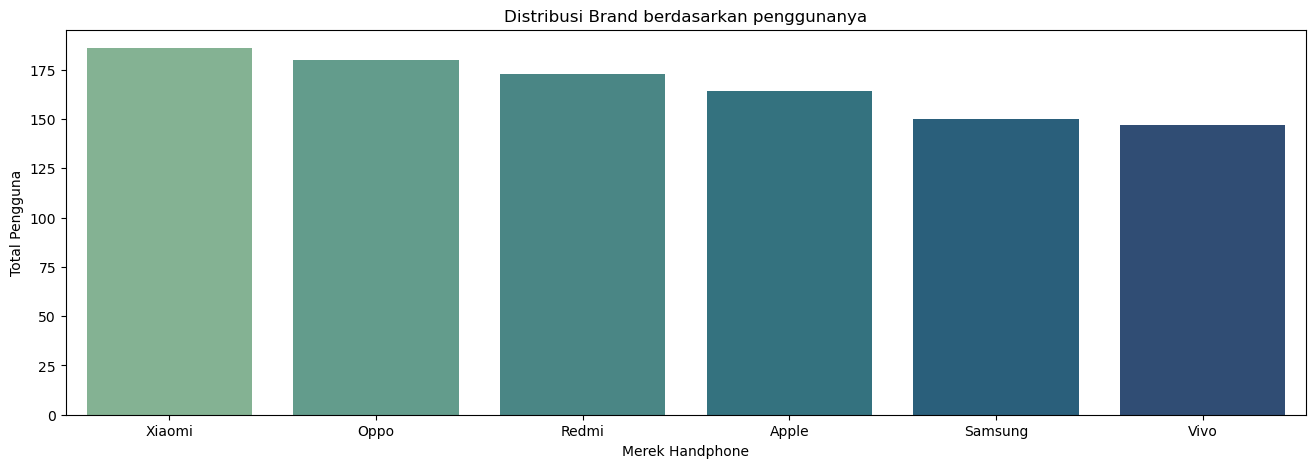

In [28]:
plt.figure(figsize=(16,5))
sns.barplot(x='Merk_Hp', y='total_pengguna', data=brand, palette='crest')
plt.title('Distribusi Brand berdasarkan penggunanya')
plt.xlabel('Merek Handphone')
plt.ylabel('Total Pengguna')
plt.show()

Dari Visualisasi diata, diketahui :
- `Xiaomi`, `Oppo`, dan `Redmi` Mendominasi Pasar, Ketiga merek asal Tiongkok ini memimpin dalam jumlah pengguna, mencerminkan popularitas mereka yang sangat tinggi di segmen harga menengah ke bawah. Keberhasilan mereka terletak pada kemampuan untuk menawarkan ponsel berkualitas dengan harga yang terjangkau.

- `Apple` dan `Samsung` Tetap Kuat, Meskipun Xiaomi, Oppo, dan Redmi lebih dominan, Apple dan Samsung tetap mempertahankan pangsa pasar yang signifikan. Merek-merek premium ini terus menjadi pilihan utama bagi konsumen yang mengutamakan kualitas dan fitur canggih yang ditawarkan.

- Meskipun jumlah penggunanya masih tertinggal, Vivo tak henti-hentinya memperkenalkan inovasi untuk memperkuat posisinya di pasar.

Insight dan Implikasi:
- Persaingan Ketat di Segmen Menengah: Segmen pasar menengah semakin sengit, dengan Xiaomi, Oppo, dan Redmi berperan sebagai pemain utama. Mereka berhasil menarik perhatian konsumen dengan menghadirkan ponsel berkualitas tanpa menguras kantong.

- Merek Premium Tetap Relevan: Meski ada persaingan ketat di pasar menengah, Apple dan Samsung tetap menjadi pilihan utama bagi konsumen yang menginginkan perangkat dengan kualitas unggul dan fitur terbaru.

## 7. Merk_hp Berdasarkan Kategori Usia

In [29]:
brand_bku = df.groupby(['Merk_Hp','Kategori_Usia'])['Kategori_Usia'].count().reset_index(name= 'Total Pengguna')
brand_bku

,Merk_Hp,Kategori_Usia,Total Pengguna
0,Apple,Dewasa,143
1,Apple,Lansia,4
2,Apple,Remaja,17
3,Oppo,Dewasa,159
4,Oppo,Lansia,11
5,Oppo,Remaja,10
6,Redmi,Dewasa,160
7,Redmi,Lansia,2
8,Redmi,Remaja,11
9,Samsung,Dewasa,134


In [30]:
fig = px.bar(brand_bku, 
             x='Kategori_Usia', 
             y='Total Pengguna', 
             color='Merk_Hp', 
             barmode='group', 
             title='Merek HP Berdasarkan Kategori Usia',
             labels={'Merk_Hp': 'Merek HP', 'Total Pengguna': 'Jumlah Pengguna', 'Kategori_Usia': 'Kategori Usia'})

# Menampilkan grafik
fig.show()

Dari Visualisasi diatas, diketahui: 
- Kelompok dewasa memiliki preferensi yang cukup beragam. Merek seperti Apple, Oppo, Redmi, Samsung, Vivo, dan Xiaomi semuanya memiliki angka yang signifikan di kalangan dewasa. Hal ini menunjukkan bahwa kelompok dewasa lebih terbuka terhadap berbagai merek dan fitur yang ditawarkan, dengan preferensi yang lebih fleksibel sesuai kebutuhan mereka.

- Kelompok remaja cenderung lebih memilih Apple, yang menunjukkan adanya ketertarikan yang tinggi terhadap ponsel dengan fitur premium dan desain yang menarik. Meskipun Xiaomi juga cukup populer, Apple lebih mendominasi di kalangan remaja, yang bisa jadi disebabkan oleh faktor prestise atau daya tarik merek tersebut.

- Kelompok lansia memiliki minat yang paling rendah terhadap ponsel pintar secara umum. Namun, di antara merek-merek yang dipilih, Oppo dan Samsung sedikit lebih unggul.

## 8. Merek Hp berdasarkan Lokasi

In [31]:
brand_by_location = df.groupby(['Merk_Hp','Nama_Lokasi'])['Nama_Lokasi'].count().reset_index(name= 'Total Pengguna')
brand_by_location

,Merk_Hp,Nama_Lokasi,Total Pengguna
0,Apple,Balikpapan,18
1,Apple,Bandung,13
2,Apple,Bekasi,14
3,Apple,Denpasar,19
4,Apple,Depok,20
5,Apple,Jakarta,23
6,Apple,Semarang,19
7,Apple,Solo,10
8,Apple,Surabaya,11
9,Apple,Yogyakarta,17


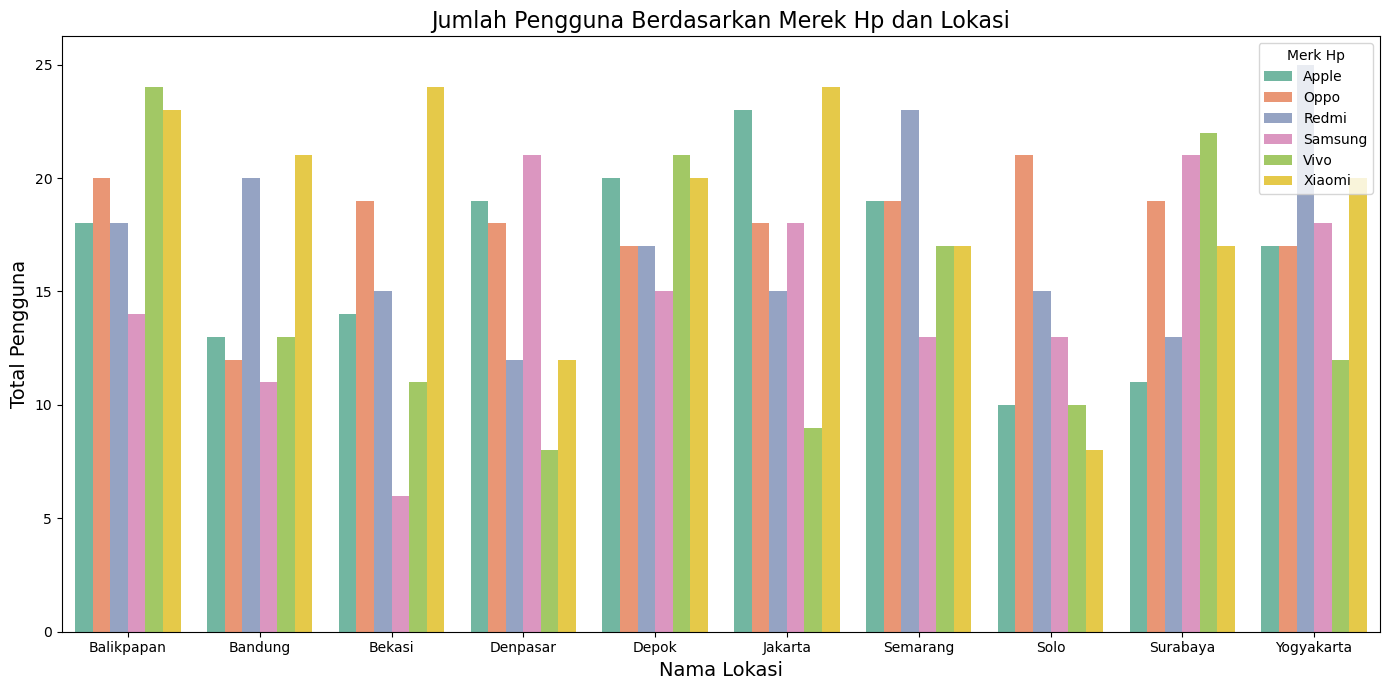

In [32]:
# Membuat plot
plt.figure(figsize=(14, 7))
sns.barplot(data=brand_by_location, x="Nama_Lokasi", y="Total Pengguna", hue="Merk_Hp", palette="Set2")

# Menambahkan label dan judul
plt.title("Jumlah Pengguna Berdasarkan Merek Hp dan Lokasi", fontsize=16)
plt.xlabel("Nama Lokasi", fontsize=14)
plt.ylabel("Total Pengguna", fontsize=14)
plt.legend(title="Merk Hp")

# Menampilkan plot
plt.tight_layout()
plt.show()

Dari Visualisasi diatas,diketahui :
- Variasi Preferensi Merek di Setiap Kota:
    - Tidak Ada Dominasi Tunggal: Tidak ada satu merek yang secara dominan mendominasi seluruh kota. Hal ini menunjukkan adanya variasi preferensi pengguna yang berbeda di setiap wilayah.
    - Preferensi Lokal: Beberapa merek mungkin lebih populer di kota tertentu dibandingkan di kota lainnya. Hal ini bisa dipengaruhi oleh berbagai - - faktor, seperti harga, ketersediaan, kampanye pemasaran, dan tren lokal.

- Popularitas Merek Secara Umum:
    - Merek Teratas: Beberapa merek mungkin muncul secara konsisten di posisi teratas pada grafik di berbagai kota, yang menunjukkan popularitasnya secara umum.
    - Merek Niche: Beberapa merek mungkin hanya populer di kota-kota tertentu, yang menunjukkan bahwa mereka memiliki pangsa pasar yang lebih spesifik.

- Potensi Pasar:
   - Kota dengan Pertumbuhan Tinggi: Kota-kota dengan peningkatan jumlah pengguna untuk merek tertentu dapat menjadi target pasar untuk ekspansi atau kampanye pemasaran lebih lanjut.
   - Kota dengan Potensi Belum Tergarap: Kota-kota dengan pangsa pasar yang lebih kecil untuk merek tertentu dapat menjadi peluang untuk meningkatkan penetrasi pasar dan mendapatkan lebih banyak pengguna.

# **Kesimpulan:**

1. Preferensi Merek Berdasarkan Kelompok Usia:
    - Dewasa: Kelompok dewasa menunjukkan preferensi yang cukup beragam terhadap berbagai merek ponsel seperti Apple, Oppo, Redmi, Samsung, Vivo, dan Xiaomi. Hal ini menunjukkan bahwa dewasa lebih terbuka terhadap berbagai pilihan ponsel dengan fitur dan harga yang beragam.
    - Remaja: Kelompok remaja lebih condong memilih Apple, meskipun Xiaomi juga cukup populer. Ketertarikan pada Apple mungkin disebabkan oleh faktor prestise dan desain ponsel yang lebih menarik.
    - Lansia: Kelompok lansia memiliki minat yang relatif rendah terhadap ponsel pintar. Namun, di antara merek yang dipilih, Apple dan Samsung lebih disukai karena kualitas dan kemudahan penggunaan.

2. Pola Aktivitas Digital Berdasarkan Waktu:
    - Dewasa: Kelompok dewasa cenderung aktif di waktu pagi dan malam hari, menunjukkan padatnya kegiatan mereka pada siang hari untuk bekerja dan - lebih memilih beristirahat pada dini hari.
    - Remaja: Remaja cenderung aktif pada pagi dan dini hari, menunjukkan pola tidur yang lebih larut dan gaya hidup yang lebih fleksibel dalam - mengatur waktu.
    - Lansia: Kelompok lansia cenderung memiliki minat digital yang lebih rendah dibandingkan dengan kelompok lainnya dan akses digital mereka cenderung merata sepanjang hari.

3. Aktivitas Digital Populer:

    - Gaming: Aktivitas gaming menjadi favorit di malam hari, menyasar berbagai kelompok usia.
    - Shopping Online: Lebih populer di kalangan dewasa, terutama pada pagi dan siang hari, mencerminkan kebiasaan belanja saat memiliki waktu luang.
    - Media Sosial & Streaming: Populer di semua kelompok usia, dengan penggunaan lebih tinggi pada malam dan pagi hari.


# **Rekomendasi Bisnis:**

1. Segmentasi Pasar Berdasarkan Usia dan Preferensi Merek:

    - Untuk pasar dewasa, strategi pemasaran dapat difokuskan pada variasi merek dan fitur, dengan mengutamakan keseimbangan antara harga dan kualitas. Merek seperti Apple, Xiaomi, dan Samsung dapat dijadikan fokus promosi.
    - Untuk remaja, lebih baik memprioritaskan Apple sebagai merek utama dalam promosi. Konten dan kampanye yang menarik bagi mereka, seperti tren terbaru atau promosi harga, akan sangat efektif.
    - Bagi lansia, penyederhanaan produk dan peningkatan fitur user-friendly seperti antarmuka yang lebih ramah pengguna pada Apple dan Samsung dapat meningkatkan adopsi ponsel pintar di kalangan mereka.

2. Pemasaran Berdasarkan Waktu Aktivitas Digital:

    - Untuk dewasa, tawarkan promosi produk pada malam hari atau pagi hari ketika mereka lebih aktif. Pertimbangkan iklan yang berfokus pada hiburan atau keseimbangan hidup antara pekerjaan dan relaksasi.
    - Untuk remaja, pemasaran bisa lebih difokuskan pada pagi dan dini hari dengan produk-produk yang menonjolkan hiburan dan tren terkini, seperti aplikasi dan game.
    - Bagi lansia, pemasaran lebih efektif dengan menawarkan informasi yang mudah diakses di sepanjang hari dan mungkin lebih fokus pada kemudahan penggunaan.

3. Optimasi Konten Digital:

    - Gaming: Fokuskan iklan game dan aplikasi hiburan pada malam hari, saat penggunaan lebih tinggi, dengan penawaran produk atau bundle untuk berbagai segmen usia.
    - Belanja Online: Tawarkan diskon atau penawaran khusus di pagi dan siang hari, mengingat kebiasaan dewasa yang lebih sering berbelanja pada waktu tersebut.
    - Streaming dan Media Sosial: Lakukan promosi untuk aplikasi streaming dan media sosial di malam dan pagi hari, dengan menyesuaikan jenis konten untuk masing-masing kelompok usia.

4. Personalisasi Pengalaman Pengguna:

    Sesuaikan rekomendasi produk dan promosi berdasarkan usia dan preferensi pelanggan. Misalnya, tawarkan game dengan tingkat kompleksitas lebih tinggi untuk dewasa dan game sosial untuk remaja. Berikan kemudahan dalam pemilihan produk bagi lansia dengan fitur yang lebih sederhana.